In [1]:
#Standard python libraries for ML project


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import datetime
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df2 = pd.read_csv('business.csv')  # Data 1 
df1 = pd.read_csv('economy.csv')   # Data 2
df = pd.concat([df1,df2])          # Concatenating the above two data 

In [3]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


DATA PREPROCESSING

In [5]:
def rep(x):
  a = x.replace("\t","").replace("\nVia","").replace("\n","") 
  return a

In [6]:
df['stop1'] = df['stop'].apply(rep)
df['stoppage'] = df['stop1'].str.split().str.get(0)

In [7]:
df['flight_number'] = df['ch_code'] + "-" + df['num_code'].astype(str)
df['price1'] = df['price'].str.replace(",","").astype(int)

In [8]:
df['time_taken1'] = df['time_taken'].str.replace(".","").str.replace("m","").str.replace("h ",".")
df['time_taken1'] = df['time_taken1'].apply(lambda x :float(x))

In [9]:
df['class']= df['price1'].apply(lambda x :'economy' if x<18000 else 'business')

CONVERSION OF DATA TO DATE TIME 


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['dep_time'] = pd.to_datetime(df['dep_time'])
df['arr_time'] = pd.to_datetime(df['arr_time'])

In [11]:
# GETTING THE DAY , DATE , MONTH , HOUR , MINUTES OF ARRIVAL AND DEPARTURE 
df['Dep_day'] = df['date'].dt.day
df['Dep_month'] = df['date'].dt.month
df['Dep_hour'] = df['dep_time'].dt.hour
df['Dep_min'] = df['dep_time'].dt.minute
df['Arr_hour'] = df['arr_time'].dt.hour
df['Arr_min'] = df['arr_time'].dt.minute

DROPPING SOME OF THE COLUMNS WHICH ARE NOT IMPORTANT

In [12]:
df.drop(columns = ['date','ch_code','num_code','dep_time','time_taken','stop','arr_time','price','stop1','flight_number'],inplace =True)

DATA VISUALIZATION 

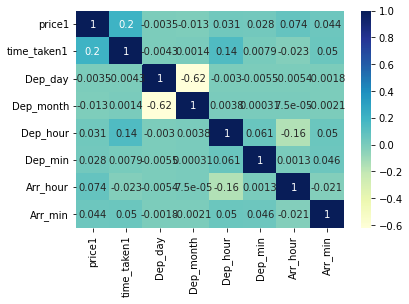

In [13]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

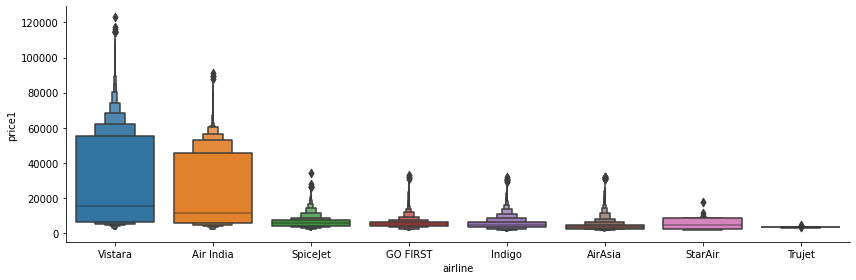

In [14]:
"""AS WE CAN SEE THAT ONE AIRLINE HAS HIGHER PRICE RANGES AS COMPARED 
TO THE OTHER AIRLINE SO INSTEAD OF ONE HOT ENCODING WE WILL USE ORDINAL ENCODER TO GET BETTER RESULTS"""

sns.catplot(y = "price1", x = "airline", data = df.sort_values("price1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

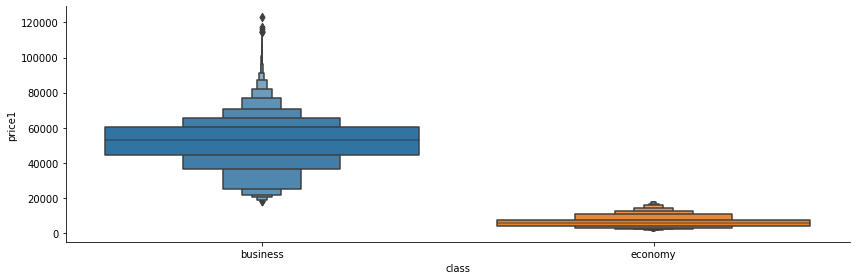

In [15]:
sns.catplot(y = "price1", x = "class", data = df.sort_values("price1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

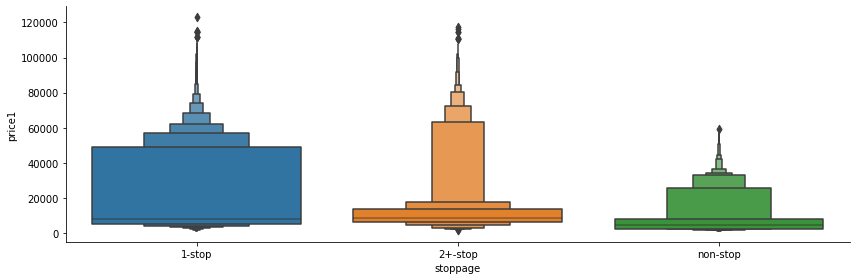

In [16]:
sns.catplot(y = "price1", x = "stoppage", data = df.sort_values("price1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

ONE HOT ENCODING AND ORDINAL ENCODING 

In [17]:
df = pd.get_dummies(df, columns=['from','to']) 

In [18]:
le = OrdinalEncoder(categories=[['Trujet','StarAir','SpiceJet','AirAsia','GO FIRST','Indigo','Air India','Vistara']])
df['airline'] = le.fit_transform(df[['airline']])

In [19]:
le = OrdinalEncoder(categories=[['2+-stop','1-stop','non-stop']])
df['stoppage'] = le.fit_transform(df[['stoppage']])

In [20]:
le = OrdinalEncoder(categories=[['economy','business']])
df['class'] = le.fit_transform(df[['class']])

AFTER ALL THE DATA CLEANING AND PRE PROCESSING OUR DATA LOOKS LIKE THIS

In [21]:
df.head(3)

,airline,stoppage,price1,time_taken1,class,Dep_day,Dep_month,Dep_hour,Dep_min,Arr_hour,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,2.0,2.0,5953,2.1,0.0,2,11,18,55,21,...,1,0,0,0,0,0,0,0,0,1
1,2.0,2.0,5953,2.2,0.0,2,11,6,20,8,...,1,0,0,0,0,0,0,0,0,1
2,3.0,2.0,5956,2.1,0.0,2,11,4,25,6,...,1,0,0,0,0,0,0,0,0,1


In [22]:
df.columns

Index(['airline', 'stoppage', 'price1', 'time_taken1', 'class', 'Dep_day',
       'Dep_month', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Bangalore', 'to_Chennai', 'to_Delhi',
       'to_Hyderabad', 'to_Kolkata', 'to_Mumbai'],
      dtype='object')

TRAIN TEST SPLIT AND TRAINNING OF THE MODELS

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns =["price1"])
y = df['price1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

In [25]:
modelKNN = KNeighborsRegressor()
modelETR = ExtraTreesRegressor()

In [26]:
MM = [modelETR,modelKNN]

MM1 = [str(x) for x in MM]
a = []
for model in MM:
  
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
 
    a.append(r2_score(y_test , y_pred))

CONVERTING THE R2_SCORE INTO A DATAFRAME 

In [27]:
d = pd.DataFrame({"Model_name":MM1,"r2_score":a})
d


,Model_name,r2_score
0,ExtraTreesRegressor(),0.954943
1,KNeighborsRegressor(),0.441214


CHOOSING EXTRA TREE REGRESSOR AND DUMPING IT USING PICKLE LIBRARY

In [ ]:
import pickle
pickle.dump(modelETR,open('model1,pkl','wb'))